<img src="https://d24cdstip7q8pz.cloudfront.net/t/ineuron1/content/common/images/final%20logo.png" height=50 alt-text="iNeuron.ai logo">

## 19.1 SQLite

* SQLite is a C library that provides a lightweight disk-based database that doesn’t require a separate server process and allows accessing the database using a nonstandard variant of the SQL query language. 
* Some applications can use SQLite for internal data storage. It’s also possible to prototype an application using SQLite and then port the code to a larger database such as PostgreSQL or Oracle.

* The sqlite3 module was written by Gerhard Häring. It provides a SQL interface compliant with the DB-API 2.0 specification described by PEP 249.

>**Note:** To use the module, you must first create a Connection object that represents the database. 

**Here, we include some basic function of SQLite;**

- **SQLite and Python types**
- **Connection Establishment with Database**
- **Table Creation and Data Insertion**
- **Some Data Filtering Operation**
- **Table Drop**

### 19.1.1 SQLite and Python types

SQLite natively supports the following types: **`NULL`**, **`INTEGER`**, **`REAL`**, **`TEXT`**, **`BLOB`**.

The following Python types can thus be sent to `SQLite` without any problem:

|Python type|SQLite type|
|:-|:-|
|None|NULL|
|int|INTEGER|
|float|REAL|
|str|TEXT|
|bytes|BLOB|

This is how SQLite types are converted to Python types by default:

|SQLite type|Python type|
|:-|:-|
|NULL|None|
|INTEGER|int|
|REAL|float|
|TEXT|depends on text_factory, str by default|
|BLOB|bytes|


### 19.1.2 Connection Establishment with Database 
Here the data will be stored in the `my_database1.db` file:

In [1]:
# importing sqlite
import sqlite3
#connecting with the database.
# Or create the DB instance
# Inside DB I can create multiple Table
db = sqlite3.connect("company_database.db")

>**Note:** You can also supply the special name `:memory:` to create a database in RAM.


### 19.1.3 Table Creation and Data Insertion
* Once you have a Connection, you can create a Cursor object and call its `execute()` method to perform SQL commands:

In [2]:
c = db.cursor()

In [3]:
# Create table ( same as SQL Syntax)
c.execute("DROP table IF EXISTS company1")
c.execute('CREATE TABLE company1(ID int, Name text, Age int, Address text, Salary real)')

In [4]:
# Insert a row of data only by providing values
c.execute("INSERT INTO company1 VALUES (1, 'Jhon', 32, 'Bangalore', 100000.00)")
c.execute("INSERT INTO company1 VALUES (2, 'Jhon', 32, 'Bangalore', 100000.00)")

In [5]:
data=c.execute("SELECT * FROM company1")

>**Note:** Its create a sqlite cursor and to get the data you need to iterate over for loop

In [6]:
for i in data:
    print(i)

(1, 'Jhon', 32, 'Bangalore', 100000.0)
(2, 'Jhon', 32, 'Bangalore', 100000.0)


* There is another way to insert in table by both key and values

In [7]:
# Insert a row of data
c.execute("INSERT INTO company (ID, Name, Age, Address, Salary) VALUES (3, 'Venkat', 42, 'Chennai', 400000.00)")

c.execute("INSERT INTO company (ID, Name, Age, Address, Salary) VALUES (4, 'Raju', 31, 'Madurai', 400000.00)")

c.execute("INSERT INTO company (ID, Name, Age, Address, Salary) VALUES (5, 'Ankit', 25, 'Bangalore', 800000.00)")

c.execute("INSERT INTO company (ID, Name, Age, Address, Salary) VALUES (6, 'Ravi', 25, 'Bangalore', 800000.00)")

c.execute("INSERT INTO company (ID, Name, Age, Address, Salary) VALUES (7, 'Shivam', 25, 'Bangalore', 800000.00)")

In [8]:
data=c.execute("SELECT * FROM company")
for i in data:
    print(i)

(1, 'Jhon', 32, 'Bangalore', 100000.0)
(2, 'Jhon', 32, 'Bangalore', 100000.0)
(3, 'Venkat', 42, 'Chennai', 400000.0)
(4, 'Raju', 31, 'Madurai', 400000.0)
(5, 'Ankit', 25, 'Bangalore', 800000.0)
(6, 'Ravi', 25, 'Bangalore', 800000.0)
(7, 'Shivam', 25, 'Bangalore', 800000.0)
(3, 'Venkat', 42, 'Chennai', 400000.0)
(4, 'Raju', 31, 'Madurai', 400000.0)
(5, 'Ankit', 25, 'Bangalore', 800000.0)
(6, 'Ravi', 25, 'Bangalore', 800000.0)
(7, 'Shivam', 25, 'Bangalore', 800000.0)


In [9]:
# Save (commit) the changes
db.commit()

In [10]:
# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.
db.close()

### 19.1.4 Some Data Filtering Operation

In [11]:
## Connecting to a Database
db = sqlite3.connect("company_database.db")
c=db.cursor()

In [12]:
'''
Showing data for salary greater than 100000
'''
data=c.execute("select * from company where Salary >100000")
for x in data:
    print(x)

(3, 'Venkat', 42, 'Chennai', 400000.0)
(4, 'Raju', 31, 'Madurai', 400000.0)
(5, 'Ankit', 25, 'Bangalore', 800000.0)
(6, 'Ravi', 25, 'Bangalore', 800000.0)
(7, 'Shivam', 25, 'Bangalore', 800000.0)
(3, 'Venkat', 42, 'Chennai', 400000.0)
(4, 'Raju', 31, 'Madurai', 400000.0)
(5, 'Ankit', 25, 'Bangalore', 800000.0)
(6, 'Ravi', 25, 'Bangalore', 800000.0)
(7, 'Shivam', 25, 'Bangalore', 800000.0)


In [13]:
'''
Showing name from data where place is Bangalore
'''
data=c.execute("select Name from company where Address = 'Bangalore'")
for x in data:
    print(x)

('Jhon',)
('Jhon',)
('Ankit',)
('Ravi',)
('Shivam',)
('Ankit',)
('Ravi',)
('Shivam',)


In [14]:
'''
Showing ID and Name from data as per accending order of Age
'''
data=c.execute("select ID, Name from company order by Age")
for x in data:
    print(x)

(5, 'Ankit')
(6, 'Ravi')
(7, 'Shivam')
(5, 'Ankit')
(6, 'Ravi')
(7, 'Shivam')
(4, 'Raju')
(4, 'Raju')
(1, 'Jhon')
(2, 'Jhon')
(3, 'Venkat')
(3, 'Venkat')


In [15]:
'''
Showing ID, Name and Age from data as per deccending order of Age
'''
data=c.execute("select ID, Name, Age from company order by Age desc")
for x in data:
    print(x)

(3, 'Venkat', 42)
(3, 'Venkat', 42)
(1, 'Jhon', 32)
(2, 'Jhon', 32)
(4, 'Raju', 31)
(4, 'Raju', 31)
(5, 'Ankit', 25)
(6, 'Ravi', 25)
(7, 'Shivam', 25)
(5, 'Ankit', 25)
(6, 'Ravi', 25)
(7, 'Shivam', 25)


### 19.1.5 Table Drop 

In [17]:
# importing sqlite
import sqlite3

#connecting with the database.
db = sqlite3.connect("food_database.db")
c = db.cursor()

# Create table to store food name and their colories
c.execute("DROP table IF EXISTS food")
c.execute('CREATE TABLE food(Name text, Calories int)') 

# Insert a row of data
c.execute("INSERT INTO food VALUES ('Mango', 60)")
c.execute("INSERT INTO food VALUES ('Samosa',262)")


In [18]:
data=c.execute("SELECT * FROM food")
for i in data:
    print(i)

('Mango', 60)
('Samosa', 262)


In [19]:
## Its recommended to use this DROP command
c.execute("DROP table IF EXISTS food")

In [20]:
## Checking its deleted or not
c.execute("DROP table food") 

OperationalError: no such table: food

#  Another example:

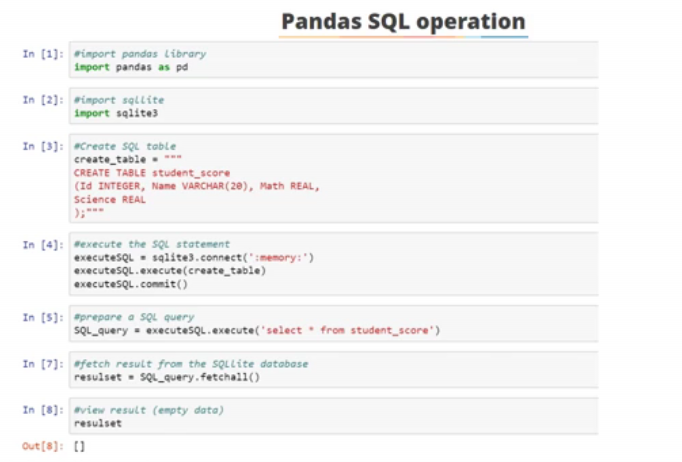

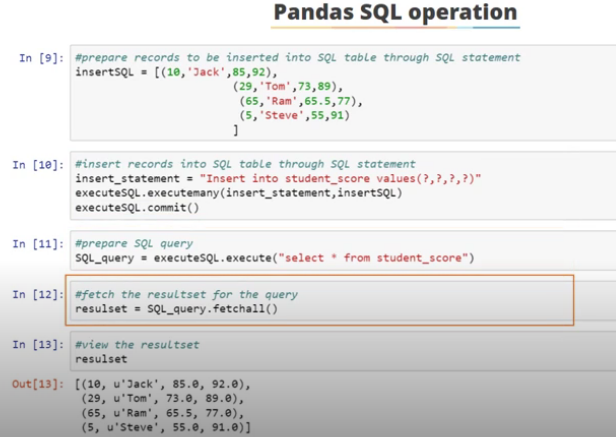

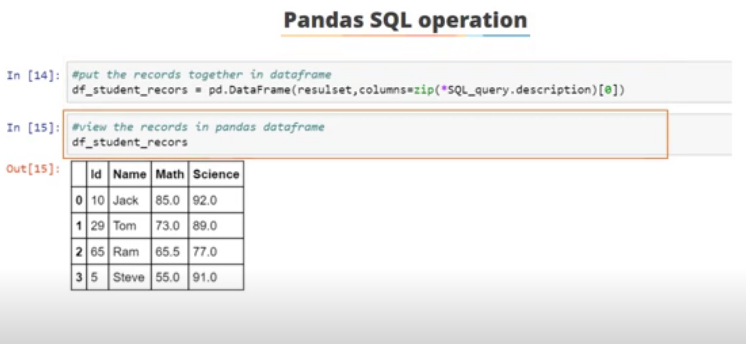